# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 4.4925	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.6123	 Accuracy 0.0729
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.1421	 A

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7810.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.1716	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.6817	 Accuracy 0.1371
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.4802	 Accuracy 0.1563
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.3576	 Accuracy 0.1717
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.2683	 Accuracy 0.1861
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.1962	 Accuracy 0.1994
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.1340	 Accuracy 0.2125
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.0845	 Accuracy 0.2228
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.0404	 Accuracy 0.2360
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.0029	 Accuracy 0.2467
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.9703	 Accuracy 0.2578

Epoch [0]	 Average training loss 0.9402	 Average training accuracy 0.2694
Epoch [0]	 Average validation loss 0.6071	 Average validation accuracy 0.4038

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.5814	 Accuracy 0.4300

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8586.



## 绘制曲线

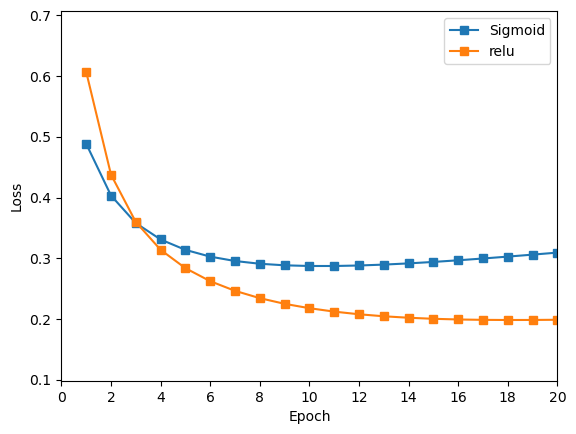

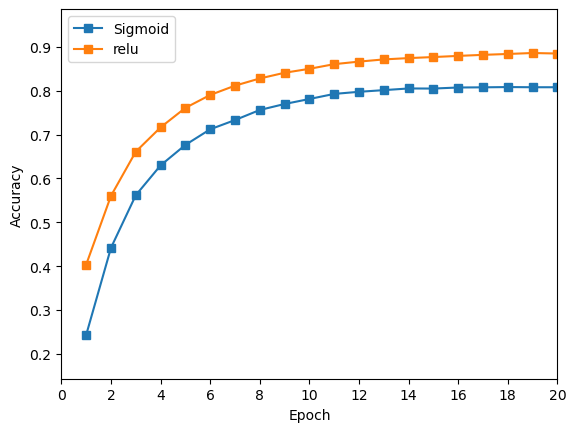

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.8257	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.6907	 Accuracy 0.1012
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.6370	 Accuracy 0.0988
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5861	 Accuracy 0.0968
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5442	 Accuracy 0.1017
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.5023	 Accuracy 0.1101
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4696	 Accuracy 0.1171
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4422	 Accuracy 0.1232
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.4175	 Accuracy 0.1306
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3965	 Accuracy 0.1371
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3772	 Accuracy 0.1442

Epoch [0]	 Average training loss 2.3603	 Average training accuracy 0.1512
Epoch [0]	 Average validation loss 2.1765	 Average validation accuracy 0.2424

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1973	 Accuracy 0.2500

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6968.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6178	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5780	 Accuracy 0.0961
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4988	 Accuracy 0.1087
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4488	 Accuracy 0.1151
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4007	 Accuracy 0.1296
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3572	 Accuracy 0.1451
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3164	 Accuracy 0.1636
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2810	 Accuracy 0.1807
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2461	 Accuracy 0.1990
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2148	 Accuracy 0.2173
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1836	 Accuracy 0.2372

Epoch [0]	 Average training loss 2.1551	 Average training accuracy 0.2566
Epoch [0]	 Average validation loss 1.8281	 Average validation accuracy 0.4692

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7820	 Accuracy 0.5300

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8687.



## 绘制曲线

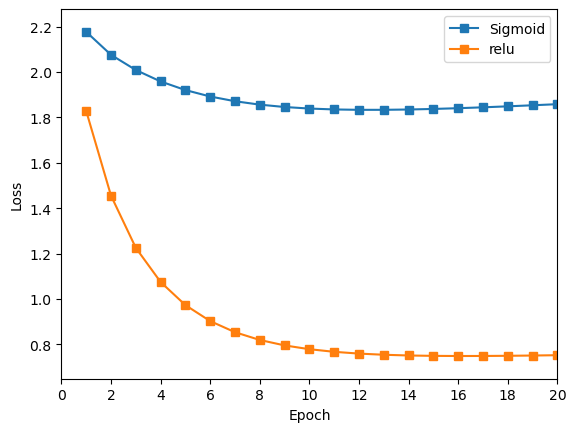

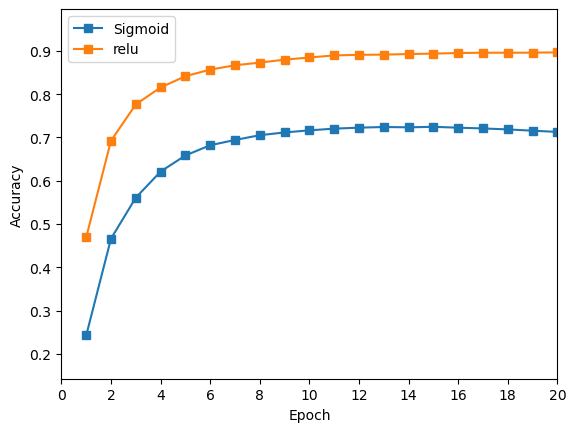

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

1. 两层Relu函数

In [22]:
criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [23]:
relu2MLP = Network()
# 128为隐含层的神经元数目
relu2MLP.add(FCLayer(784, 128))
relu2MLP.add(ReLULayer())
relu2MLP.add(ReLULayer())
relu2MLP.add(FCLayer(128, 10))

In [24]:
relu2MLP, relu2_loss, relu2_acc = train(relu2MLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4903	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4546	 Accuracy 0.1345
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3980	 Accuracy 0.1470
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3443	 Accuracy 0.1639
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.2983	 Accuracy 0.1790
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2523	 Accuracy 0.1990
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2119	 Accuracy 0.2197
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1750	 Accuracy 0.2389
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1407	 Accuracy 0.2576
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1092	 Accuracy 0.2754
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0792	 Accuracy 0.2927

Epoch [0]	 Average training loss 2.0511	 Average training accuracy 0.3098
Epoch [0]	 Average validation loss 1.7136	 Average validation accuracy 0.5026

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6485	 Accuracy 0.5700

In [25]:
test(relu2MLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8696.



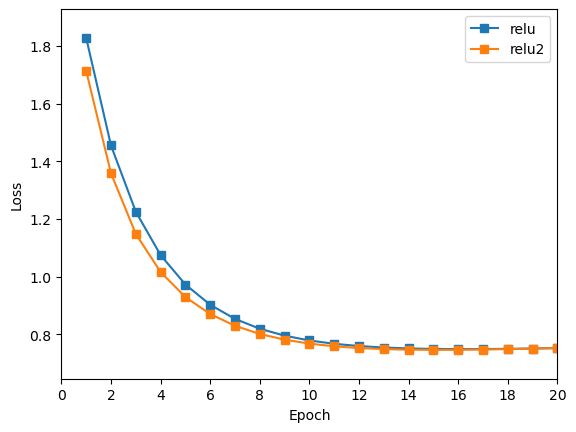

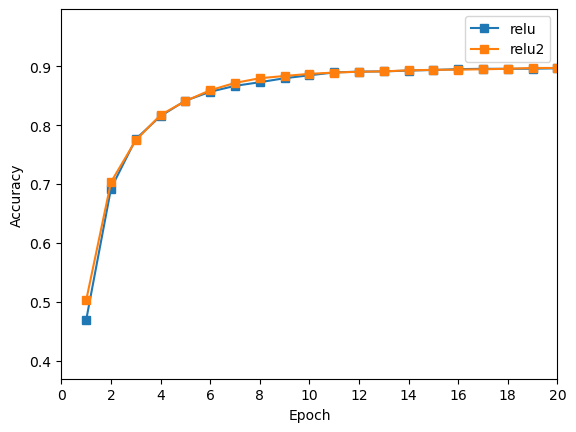

In [26]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc],
                   'relu2': [relu2_loss, relu2_acc]})

2. 两层 Sigmoid 函数

In [27]:
from criterion import EuclideanLossLayer,SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, SigmoidLayer, ReLULayer


criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [28]:
sigmoid2MLP = Network()
# 128为隐含层的神经元数目
sigmoid2MLP.add(FCLayer(784, 128))
sigmoid2MLP.add(SigmoidLayer())
sigmoid2MLP.add(SigmoidLayer())
sigmoid2MLP.add(FCLayer(128, 10))

In [29]:
sigmoid2MLP, sigmoid2_loss, sigmoid2_acc = train(sigmoid2MLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.1458	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.9153	 Accuracy 0.0965
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.8551	 Accuracy 0.0973
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.7942	 Accuracy 0.0974
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.7431	 Accuracy 0.0993
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.6934	 Accuracy 0.1038
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.6501	 Accuracy 0.1102
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.6146	 Accuracy 0.1118
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5830	 Accuracy 0.1151
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.5559	 Accuracy 0.1185
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.5327	 Accuracy 0.1208

Epoch [0]	 Average training loss 2.5129	 Average training accuracy 0.1240
Epoch [0]	 Average validation loss 2.3027	 Average validation accuracy 0.1728

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.3163	 Accuracy 0.1500

In [30]:
test(sigmoid2MLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1137.



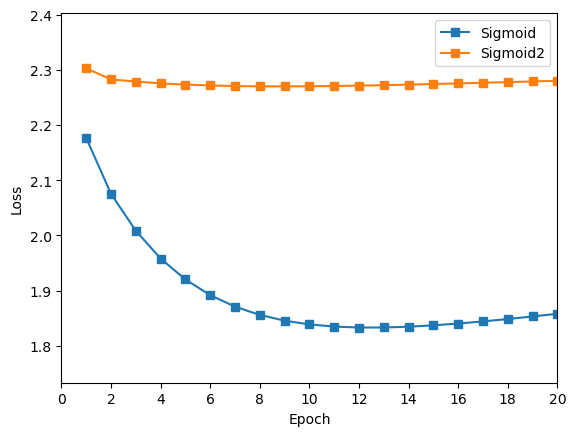

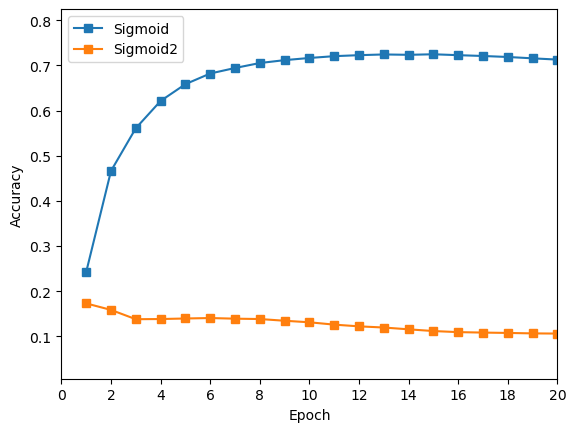

In [31]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'Sigmoid2': [sigmoid2_loss, sigmoid2_acc]})

3. 两种激活函数结合

In [7]:
from criterion import EuclideanLossLayer,SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, SigmoidLayer, ReLULayer


criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [8]:
ReluSigmoidMLP = Network()
# 128为隐含层的神经元数目
ReluSigmoidMLP.add(FCLayer(784, 128))
ReluSigmoidMLP.add(ReLULayer())
ReluSigmoidMLP.add(SigmoidLayer())
ReluSigmoidMLP.add(FCLayer(128, 10))

In [9]:
ReluSigmoidMLP, ReluSigmoid_loss, ReluSigmoid_acc = train(ReluSigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5460	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5736	 Accuracy 0.0845
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5329	 Accuracy 0.0842
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4993	 Accuracy 0.0911
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4704	 Accuracy 0.0995
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4481	 Accuracy 0.1086
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4284	 Accuracy 0.1180
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4126	 Accuracy 0.1260
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3980	 Accuracy 0.1338
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3859	 Accuracy 0.1418
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3749	 Accuracy 0.1474

Epoch [0]	 Average training loss 2.3655	 Average training accuracy 0.1523
Epoch [0]	 Average validation loss 2.2657	 Average validation accuracy 0.2028

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2449	 Accuracy 0.1800

In [10]:
test(ReluSigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6315.



In [11]:
SigmoidReluMLP = Network()
# 128为隐含层的神经元数目
SigmoidReluMLP.add(FCLayer(784, 128))
SigmoidReluMLP.add(SigmoidLayer())
SigmoidReluMLP.add(ReLULayer())
SigmoidReluMLP.add(FCLayer(128, 10))

In [12]:
SigmoidReluMLP, SigmoidRelu_loss, SigmoidRelu_acc = train(SigmoidReluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5475	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4906	 Accuracy 0.0865
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4602	 Accuracy 0.0854
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4298	 Accuracy 0.0905
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4054	 Accuracy 0.0945
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3834	 Accuracy 0.0988
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3651	 Accuracy 0.1037
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3496	 Accuracy 0.1108
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3362	 Accuracy 0.1177
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3249	 Accuracy 0.1251
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3140	 Accuracy 0.1332

Epoch [0]	 Average training loss 2.3048	 Average training accuracy 0.1403
Epoch [0]	 Average validation loss 2.1918	 Average validation accuracy 0.2436

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1584	 Accuracy 0.3200

In [13]:
test(SigmoidReluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6996.



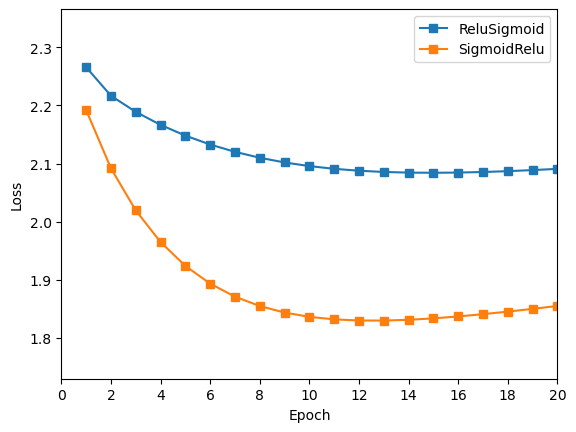

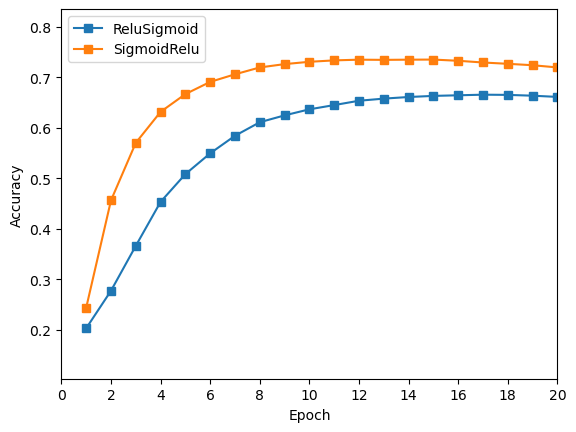

In [14]:
plot_loss_and_acc({'ReluSigmoid': [ReluSigmoid_loss, ReluSigmoid_acc],
                   'SigmoidRelu': [SigmoidRelu_loss, SigmoidRelu_acc]})

 搜索最佳参数

In [6]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, ReLULayer
import itertools
import gc

# 定义超参数的可能取值
batch_sizes = [32]
max_epochs = [10]
learning_rates = [0.001, 0.005, 0.01]
weight_decays = [0.1, 0.01, 0.001]

# 保存最佳结果的变量
best_accuracy = 0.0
best_hyperparameters = {}
criterion = SoftmaxCrossEntropyLossLayer()

def build_and_train_model(batch_size, max_epoch, learning_rate, weight_decay):
    sgd = SGD(learning_rate, weight_decay)
    
    model = Network()
    # 128为隐含层的神经元数目
    model.add(FCLayer(784, 128))
    model.add(ReLULayer())
    model.add(ReLULayer())
    model.add(FCLayer(128, 10))
    model, model_loss, model_acc = train(model, criterion, sgd, data_train, max_epoch, batch_size, 1000)
    return model, model_loss, model_acc

# 遍历所有超参数组合
for batch_size, max_epoch, learning_rate, weight_decay in itertools.product(
    batch_sizes, max_epochs, learning_rates, weight_decays
):
    # 构建和训练模型（使用当前超参数组合）
    model, model_loss, model_acc = build_and_train_model(batch_size, max_epoch, learning_rate, weight_decay)
    
    accuracy = test(model, criterion, data_test, batch_size, disp_freq)
    # 如果当前组合的性能更好，则更新最佳结果
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = {
            'batch_size': batch_size,
            'max_epoch': max_epoch,
            'learning_rate': learning_rate,
            'weight_decay': weight_decay
        }
    del model  # 删除网络对象
    gc.collect()     # 执行垃圾回收



# 打印最佳结果
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][10]	 Batch [0][1718]	 Training Loss 2.4491	 Accuracy 0.0625
Epoch [0][10]	 Batch [1000][1718]	 Training Loss 1.8657	 Accuracy 0.4227

Epoch [0]	 Average training loss 1.6390	 Average tr

MemoryError: bad allocation

In [7]:
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'batch_size': 32, 'max_epoch': 10, 'learning_rate': 0.005, 'weight_decay': 0.001}
Best Accuracy: 0.9421073717948718


In [7]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, ReLULayer
import itertools
import gc

# 定义超参数的可能取值
batch_sizes = [32]
max_epochs = [20]
learning_rates = [0.001, 0.005, 0.01]
weight_decays = [0.1, 0.01, 0.001]

# 保存最佳结果的变量
best_accuracy = 0.0
best_hyperparameters = {}
criterion = SoftmaxCrossEntropyLossLayer()

def build_and_train_model(batch_size, max_epoch, learning_rate, weight_decay):
    sgd = SGD(learning_rate, weight_decay)
    
    model = Network()
    # 128为隐含层的神经元数目
    model.add(FCLayer(784, 128))
    model.add(ReLULayer())
    model.add(ReLULayer())
    model.add(FCLayer(128, 10))
    model, model_loss, model_acc = train(model, criterion, sgd, data_train, max_epoch, batch_size, 1000)
    return model, model_loss, model_acc

# 遍历所有超参数组合
for batch_size, max_epoch, learning_rate, weight_decay in itertools.product(
    batch_sizes, max_epochs, learning_rates, weight_decays
):
    # 构建和训练模型（使用当前超参数组合）
    model, model_loss, model_acc = build_and_train_model(batch_size, max_epoch, learning_rate, weight_decay)
    
    accuracy = test(model, criterion, data_test, batch_size, disp_freq)
    # 如果当前组合的性能更好，则更新最佳结果
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = {
            'batch_size': batch_size,
            'max_epoch': max_epoch,
            'learning_rate': learning_rate,
            'weight_decay': weight_decay
        }
    del model  # 删除网络对象
    gc.collect()     # 执行垃圾回收



# 打印最佳结果
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][1718]	 Training Loss 2.6279	 Accuracy 0.0625
Epoch [0][20]	 Batch [1000][1718]	 Training Loss 1.9016	 Accuracy 0.4116

Epoch [0]	 Average training loss 1.6669	 Average tr

MemoryError: bad allocation

In [8]:
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'batch_size': 32, 'max_epoch': 20, 'learning_rate': 0.005, 'weight_decay': 0.001}
Best Accuracy: 0.9524238782051282
